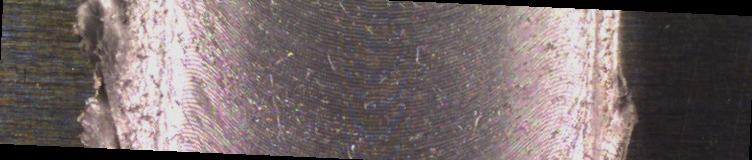

In [147]:
from PIL import Image
import numpy as np
from torchvision import transforms
img = Image.open(r"C:\Users\tsx10\PythonProjectsJupyter\TUM\FP\trainning_dense121\data\raw\test\1\5_000_500_4000_5_7.jpg")

img = np.array(img)/255

tsr = transforms.Compose([transforms.ToTensor(), transforms.RandomRotation(degrees=5), transforms.ColorJitter(hue=0.15, saturation=0.15, brightness=0.25), transforms.GaussianBlur((7, 7), sigma=(0.1, 0.5)), transforms.ToPILImage()])
img = tsr(img)
img

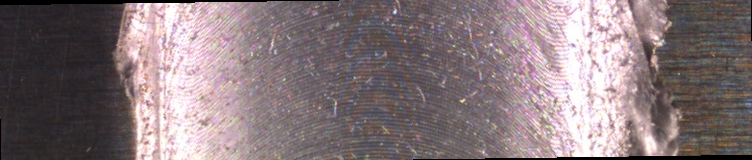

In [28]:
from PIL import Image
import numpy as np
from torchvision import transforms
img = Image.open(r"C:\Users\tsx10\PythonProjectsJupyter\TUM\FP\trainning_dense121\data\raw\test\1\5_000_500_4000_5_7.jpg")

img = np.array(img)/255

tsr = transforms.Compose([transforms.ToTensor(), 
                          transforms.RandomAffine(degrees=2),
                          transforms.RandomHorizontalFlip(p=0.5),
                          transforms.RandomVerticalFlip(p=0.5),
                          transforms.RandomGrayscale(p=0.1),
                          transforms.ToPILImage()])
img = tsr(img)
img

Augumentation

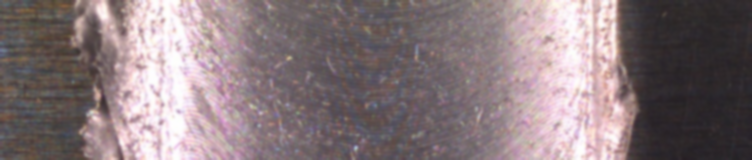

In [34]:
from torchvision import transforms
import torch

img = Image.open(r"C:\Users\tsx10\PythonProjectsJupyter\TUM\FP\trainning_dense121\data\raw\test\1\5_000_500_4000_5_7.jpg")

ts = transforms.GaussianBlur((7, 7), sigma=(0.1, 2))
img_rotate = ts(img)
img_rotate

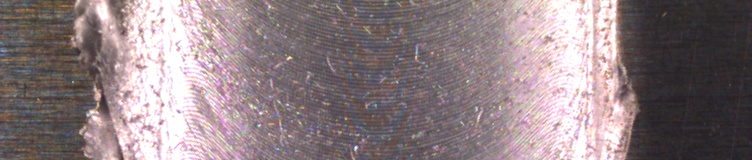

In [49]:
# torch.manual_seed(1)
ts = transforms.ColorJitter(brightness=0.25)
img_a = ts(img)
img_a

Random Seed

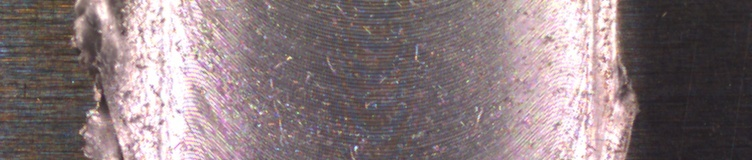

In [44]:
from PIL import Image
import torch
import numpy as np
from torchvision import transforms
img = Image.open(r"C:\Users\tsx10\PythonProjectsJupyter\TUM\FP\trainning_dense121\data\raw\test\1\5_000_500_4000_5_7.jpg")

img = np.array(img)
trans = transforms.ToPILImage()
img = trans(img)
img


In [ ]:
import torch
class AddNoiseToTensor(object):
    def __init__(self, p, alpha):
        """
        implements the __call__ method of a torchvision transform operation

        Args:
            p: probability with which the transform should be applied
            alpha: scaling factor for the normal distributed noise
        """
        self.p = p
        self.a = alpha

    def __call__(self, x):

        # tip: use pytorch for random operations, since it handles management of random seeds in
        # workers of dataloader correctly. Numpy for example doesn't, which results in identical samples
        if torch.rand(1) < self.p:
            # add noise from normal distribution to tensor with a given probability
            return x + torch.randn_like(x) * self.a
        return x